In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('cricket_tweets_DA.csv')

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1433440359477096453,Cricket World,Global,Official Twitter account of Cricket World - ne...,2009-01-23 10:49:02,58699,9834,90829,True,2021-09-02 14:43:08,🏏 Rizwan Cheema has been named team captain of...,NaN,Twitter Web App,0,0,False
1,1433438874995343361,Ⓜ️ithun,"मुंबई, भारत",Cricket 🏏\nPhotography📷 \nWildlife🐅 \nNature🌳,2010-01-09 15:38:06,7,97,343,False,2021-09-02 14:37:14,Virat Kohli being fixated on retaining specifi...,NaN,Twitter for Android,0,0,False
2,1433436646645501956,Akram Khan,NaN,BLOGGER | ＣＲＩＣＫＥＴ ＬＯＶＥＲ | Fond of full forms,2014-07-08 00:39:28,1455,39,8486,False,2021-09-02 14:28:23,"My tribute to the world's fastest bowler ever,...",['shoaibakhtarpeaceambassador'],Twitter Web App,1,3,False
3,1433433904438931474,Mr.P,"Mumbai, India",nothing,2013-08-25 10:07:10,15,675,4590,False,2021-09-02 14:17:29,this guy's life is incomplete without Kohli's ...,NaN,Twitter for Android,0,5,False
4,1433433383024005131,Cricket_Kith,NaN,"Crick, Crick, Cricket🏏\nDon't Throw Your Wicke...",2021-09-01 11:39:18,0,6,27,False,2021-09-02 14:15:25,When Rishabh Pant Stepped Out Robinson 😂\nWhol...,"['ENGvIND', 'Cricket', 'BCCI', 'Ovaltest', 'No...",Twitter for Android,0,1,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60862 entries, 0 to 60861
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                60862 non-null  int64 
 1   user_name         60862 non-null  object
 2   user_location     40594 non-null  object
 3   user_description  57449 non-null  object
 4   user_created      60862 non-null  object
 5   user_followers    60862 non-null  int64 
 6   user_friends      60862 non-null  int64 
 7   user_favourites   60862 non-null  int64 
 8   user_verified     60862 non-null  bool  
 9   date              60862 non-null  object
 10  text              60862 non-null  object
 11  hashtags          42038 non-null  object
 12  source            60862 non-null  object
 13  retweets          60862 non-null  int64 
 14  favorites         60862 non-null  int64 
 15  is_retweet        60862 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 6.6+ MB


In [ ]:
df.isnull().sum()

id                      0
user_name               0
user_location       20268
user_description     3413
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            18824
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,🏏 Rizwan Cheema has been named team captain of...
1,Virat Kohli being fixated on retaining specifi...
2,"My tribute to the world's fastest bowler ever,..."
3,this guy's life is incomplete without Kohli's ...
4,When Rishabh Pant Stepped Out Robinson 😂\nWhol...


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

🏏 Rizwan Cheema has been named team captain of the Premium Paks Cricket Club in the American Premiere League (APL).… https://t.co/PIDguciKFH 

Virat Kohli being fixated on retaining specific players with average performances so far in the series is something… https://t.co/gH8qDsXS5I 

My tribute to the world's fastest bowler ever, @shoaib100mph with a unique full form.

#shoaibakhtarpeaceambassador… https://t.co/O3Ni946zpg 

this guy's life is incomplete without Kohli's failure. Maybe Kohli fu*ked his mom in 2017 srilanka tour. carry on d… https://t.co/d4LRNHfPs0 

When Rishabh Pant Stepped Out Robinson 😂
Whole Nation To Pant
#ENGvIND #Cricket #BCCI #Ovaltest #Nottingham… https://t.co/73wg1HlDbm 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60862 entries, 0 to 60861
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60862 non-null  object
dtypes: object(1)
memory usage: 475.6+ KB


In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,text
0,rizwan cheema named team captain premium paks ...
1,virat kohli fixated retaining specific players...
2,tribute worlds fastest bowler ever shoaib100mp...
3,guys life incomplete without kohlis failure ma...
4,rishabh pant stepped robinson whole nation pan...


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

rizwan cheema named team captain premium paks cricket club american premiere league apl 

virat kohli fixated retaining specific players average performances far series something 

tribute worlds fastest bowler ever shoaib100mph unique full form shoaibakhtarpeaceambassador 

guys life incomplete without kohlis failure maybe kohli fuked mom 2017 srilanka tour carry 

rishabh pant stepped robinson whole nation pant engvind cricket bcci ovaltest nottingham 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55723 entries, 0 to 60861
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    55723 non-null  object
dtypes: object(1)
memory usage: 870.7+ KB


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [ ]:
text_df.head(10)

,text,polarity
0,rizwan cheema named team captain premium paks ...,0.000000
1,virat kohli fixated retaining specific players...,-0.016667
2,tribute worlds fastest bowler ever shoaib100mp...,0.362500
3,guys life incomplete without kohlis failure ma...,-0.316667
4,rishabh pant stepped robinson whole nation pan...,0.200000
5,new cricket podcast say well episode 1 well usual,-0.056818
6,classic 50 imvkohli well played boy cricket vi...,0.166667
7,kohli looks sublime touch indvseng ashwin cric...,0.000000
8,𝐅𝐚𝐬𝐭𝐞𝐬𝐭 𝐭𝐨 𝐬𝐜𝐨𝐫𝐞 𝟐𝟑𝟎𝟎𝟎 𝐢𝐧𝐭𝐞𝐫𝐧𝐚𝐭𝐢𝐨𝐧𝐚𝐥 𝐫𝐮𝐧𝐬 vira...,0.000000
9,live odi cricket srilanka score 2905 runs 183 ...,0.136364


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

,text,polarity,sentiment
0,rizwan cheema named team captain premium paks ...,0.000000,Neutral
1,virat kohli fixated retaining specific players...,-0.016667,Negative
2,tribute worlds fastest bowler ever shoaib100mp...,0.362500,Positive
3,guys life incomplete without kohlis failure ma...,-0.316667,Negative
4,rishabh pant stepped robinson whole nation pan...,0.200000,Positive


<Axes: xlabel='sentiment', ylabel='count'>

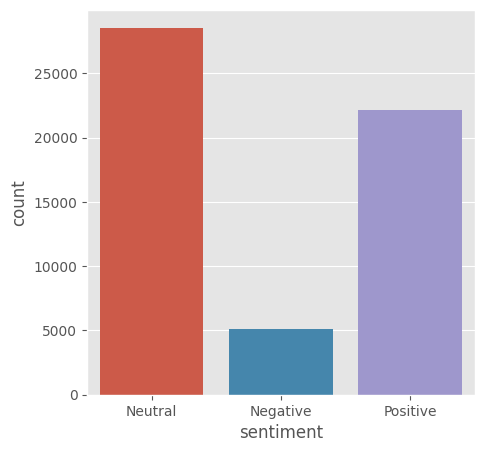

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

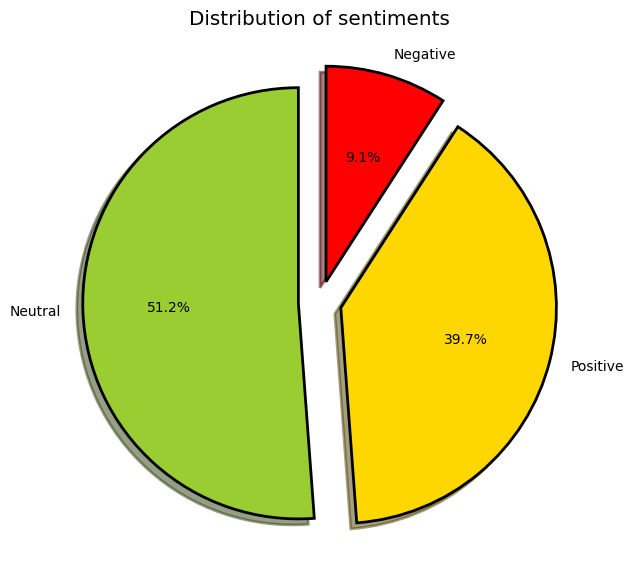

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
36943,excellent unbeaten knock skipper rishabh pant ...,1.0,Positive
14325,best bowler tests cricket,1.0,Positive
43242,best cricket highlights app cricket crickethig...,1.0,Positive
7324,superb drive kingkohli viratkohli coverdrive c...,1.0,Positive
31838,one best thrillers ipl2021 season csk 2 wicket...,1.0,Positive


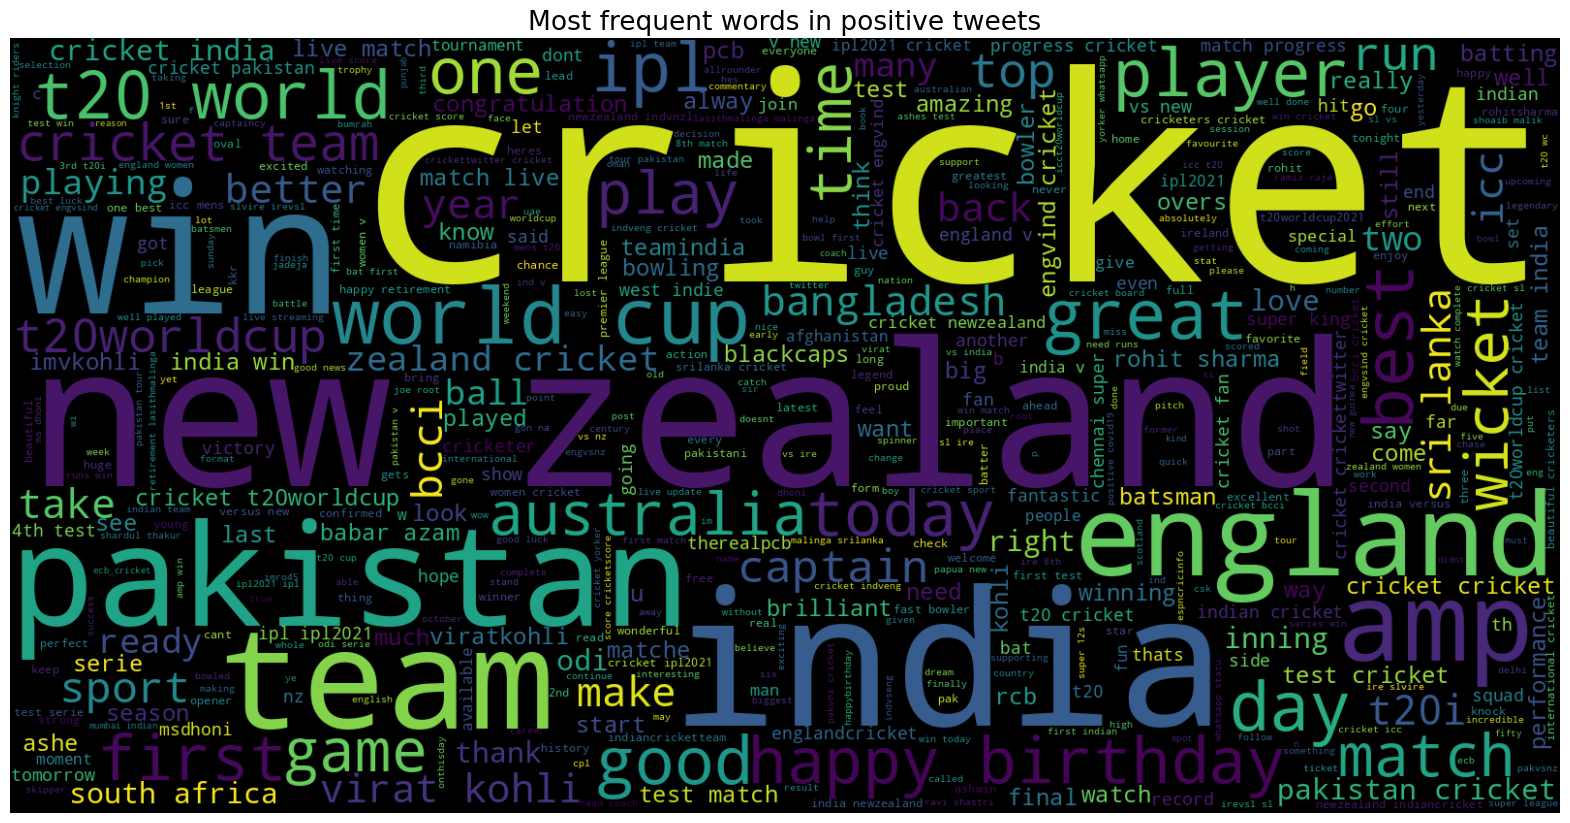

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
58710,15210 t20 wc final much better poor clown dani...,-6.938894e-18,Negative
46860,dont spoil fun watching world cup broken old s...,-9.251859e-18,Negative
37443,dixcyscott 1 golden duck 2 ball 3 dead ball 4 ...,-9.251859e-18,Negative
37335,dixcyscott 1 golden duck 2 ball 3 dead ball 4 ...,-9.251859e-18,Negative
36926,dixcyscott 1 golden duck 2 ball 3 dead ball 4 ...,-9.251859e-18,Negative


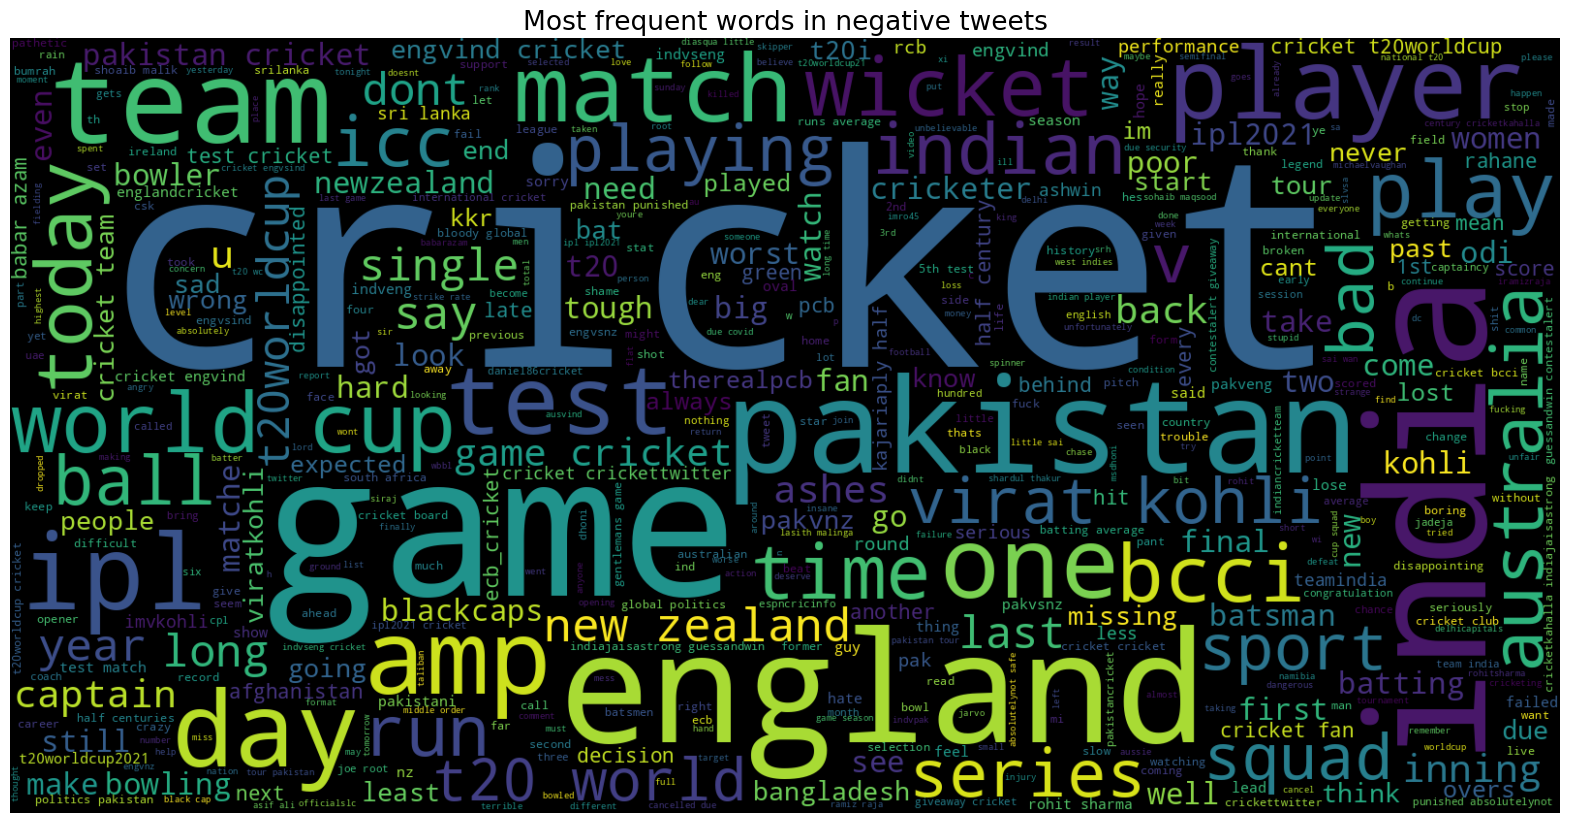

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,rizwan cheema named team captain premium paks ...,0.0,Neutral
40935,myvolini andre russell injurypremierleague vol...,0.0,Neutral
40956,myvolini andre russell injurypremierleague vol...,0.0,Neutral
40955,biggest jersey reveal yet sayin fans cant wait...,0.0,Neutral
40954,last bit work square etherbycc winter 23rds to...,0.0,Neutral


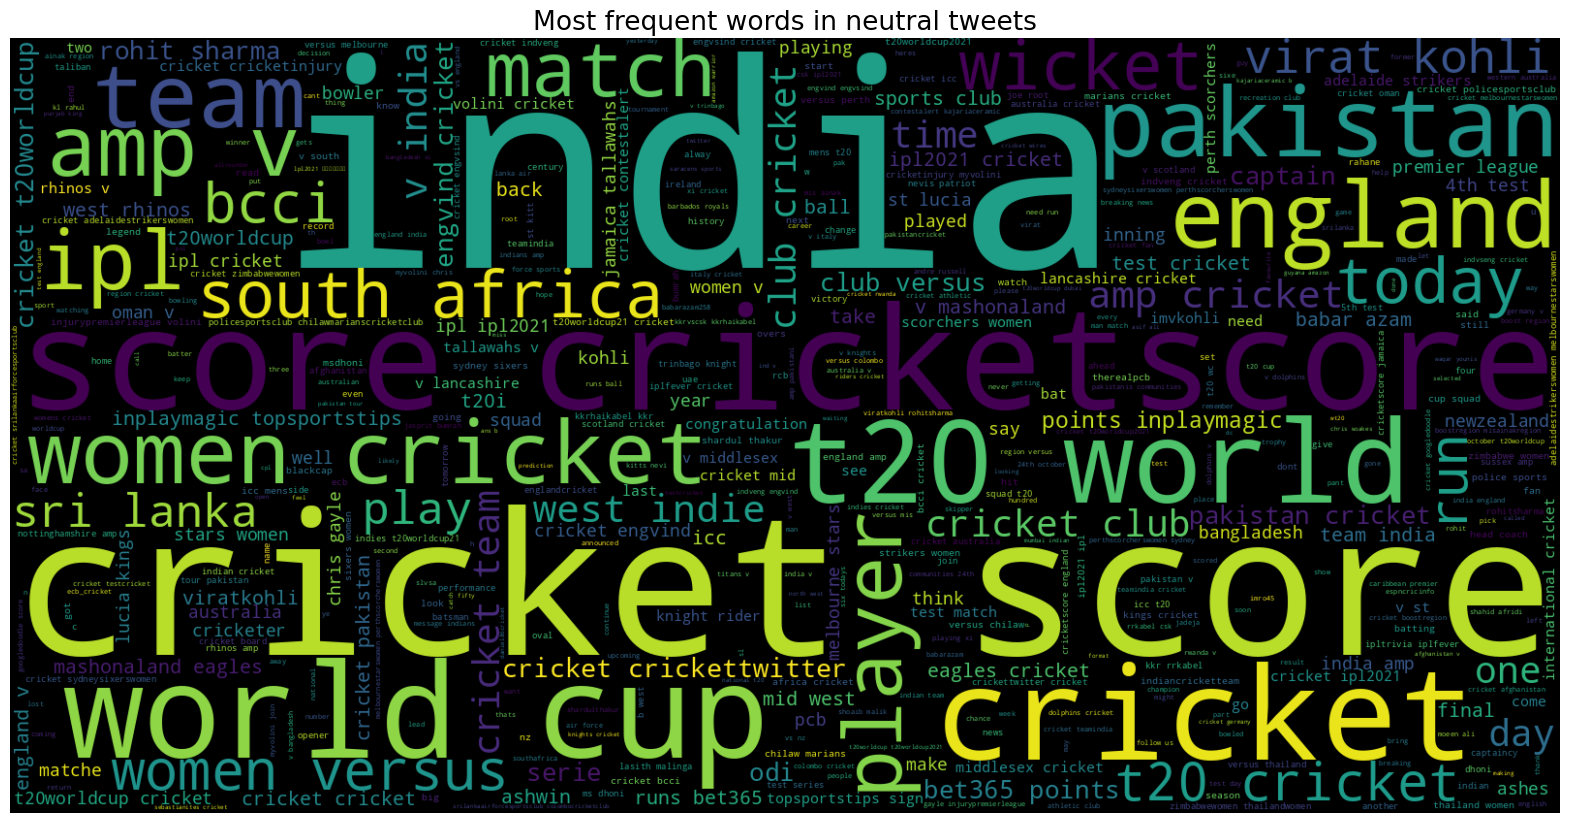

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 332600

First 20 features:
 ['00' '00 1989' '00 af' '00 afte' '00 australia' '00 cricket' '00 gmt'
 '00 need' '00 ov' '00 overs' '00 rakeshtikait' '00 rcb' '000'
 '000 international' '0001' '0001 lik' '0002671' '0002671 satoshis'
 '001ethan' '001ethan criccrazyjohns']


In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (44578, 332600)
Size of y_train: (44578,)
Size of x_test: (11145, 332600)
Size of y_test: (11145,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Logistic regression  accuracy: {:.2f}%".format(logreg_acc*100))

Logistic regression  accuracy: 93.41%


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test, logreg_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, logreg_pred))

Confusion Matrix:
 [[ 682  281   73]
 [   4 5639   22]
 [  36  319 4089]]


Classification Report:
               precision    recall  f1-score   support

    Negative       0.94      0.66      0.78      1036
     Neutral       0.90      1.00      0.95      5665
    Positive       0.98      0.92      0.95      4444

    accuracy                           0.93     11145
   macro avg       0.94      0.86      0.89     11145
weighted avg       0.94      0.93      0.93     11145



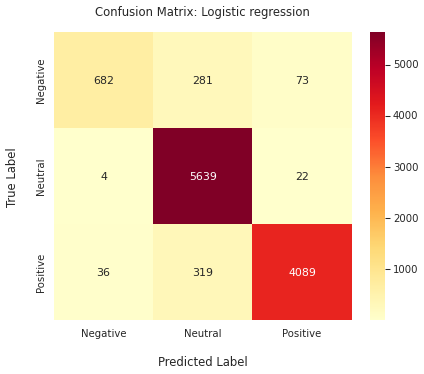

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=60)
sns.set(font_scale = 1.1)
cm = confusion_matrix(y_test, logreg_pred)
grid_map = sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
grid_map.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
grid_map.xaxis.set_ticklabels(['Negative', 'Neutral','Positive'])
grid_map.set_ylabel("True Label", fontsize=14, labelpad=20)
grid_map.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
grid_map.set_title("Confusion Matrix: Logistic regression", fontsize=14, pad=20)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
Hyper_logreg_acc = accuracy_score(y_pred, y_test)
print("Logistic regression Hyperparameter tuned accuracy: {:.2f}%".format(Hyper_logreg_acc*100))

Logistic regression Hyperparameter tuned accuracy: 94.29%


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 729  239   68]
 [   5 5640   20]
 [  35  269 4140]]


Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.70      0.81      1036
     Neutral       0.92      1.00      0.95      5665
    Positive       0.98      0.93      0.95      4444

    accuracy                           0.94     11145
   macro avg       0.95      0.88      0.91     11145
weighted avg       0.94      0.94      0.94     11145



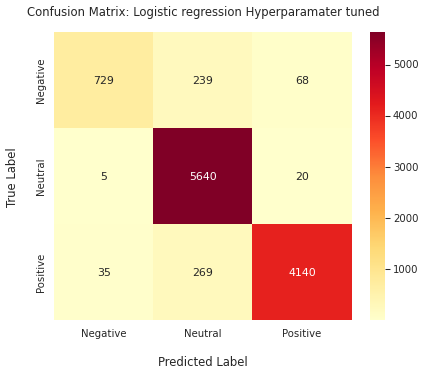

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=60)
sns.set(font_scale = 1.1)
cm = confusion_matrix(y_test, y_pred)
grid_map = sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
grid_map.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
grid_map.xaxis.set_ticklabels(['Negative', 'Neutral','Positive'])
grid_map.set_ylabel("True Label", fontsize=14, labelpad=20)
grid_map.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
grid_map.set_title("Confusion Matrix: Logistic regression Hyperparamater tuned", fontsize=14, pad=20)
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Linear SVC accuracy: {:.2f}%".format(svc_acc*100))

Linear SVC accuracy: 95.50%


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test, svc_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, svc_pred))

Confusion Matrix:
 [[ 808  173   55]
 [   6 5641   18]
 [  36  214 4194]]


Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.78      0.86      1036
     Neutral       0.94      1.00      0.96      5665
    Positive       0.98      0.94      0.96      4444

    accuracy                           0.95     11145
   macro avg       0.96      0.91      0.93     11145
weighted avg       0.96      0.95      0.95     11145



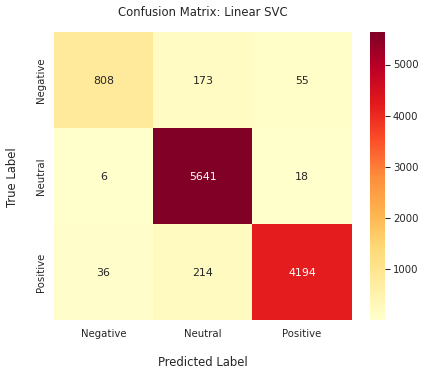

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=60)
sns.set(font_scale = 1.1)
cm = confusion_matrix(y_test, svc_pred)
grid_map = sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
grid_map.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
grid_map.xaxis.set_ticklabels(['Negative', 'Neutral','Positive'])
grid_map.set_ylabel("True Label", fontsize=14, labelpad=20)
grid_map.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
grid_map.set_title("Confusion Matrix: Linear SVC", fontsize=14, pad=20)
plt.show()

In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
Hyper_svc_acc = accuracy_score(y_pred, y_test)
print("Hyperparameter tuned Linear SVC accuracy: {:.2f}%".format(Hyper_svc_acc*100))

Hyperparameter tuned Linear SVC accuracy: 95.59%


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 813  168   55]
 [   6 5642   17]
 [  36  210 4198]]


Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.78      0.86      1036
     Neutral       0.94      1.00      0.97      5665
    Positive       0.98      0.94      0.96      4444

    accuracy                           0.96     11145
   macro avg       0.96      0.91      0.93     11145
weighted avg       0.96      0.96      0.95     11145



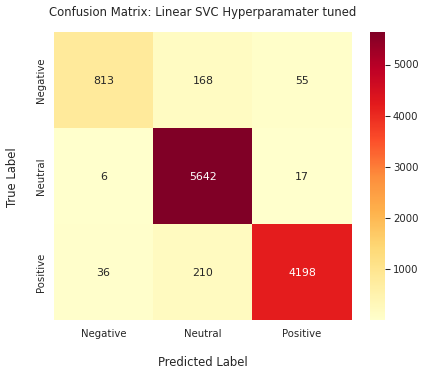

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=60)
sns.set(font_scale = 1.1)
cm = confusion_matrix(y_test, y_pred)
grid_map = sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
grid_map.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
grid_map.xaxis.set_ticklabels(['Negative', 'Neutral','Positive'])
grid_map.set_ylabel("True Label", fontsize=14, labelpad=20)
grid_map.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
grid_map.set_title("Confusion Matrix: Linear SVC Hyperparamater tuned", fontsize=14, pad=20)
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Hyperparameter tuned LR','Linear SVC',
                                   'Hyperparameter tuned LinearSVC'], 'Accuracy': [logreg_acc*100,Hyper_logreg_acc*100, 
                                                                                      svc_acc*100, Hyper_svc_acc*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,93.405114
1,Hyperparameter tuned LR,94.293405
2,Linear SVC,95.495738
3,Hyperparameter tuned LinearSVC,95.585464


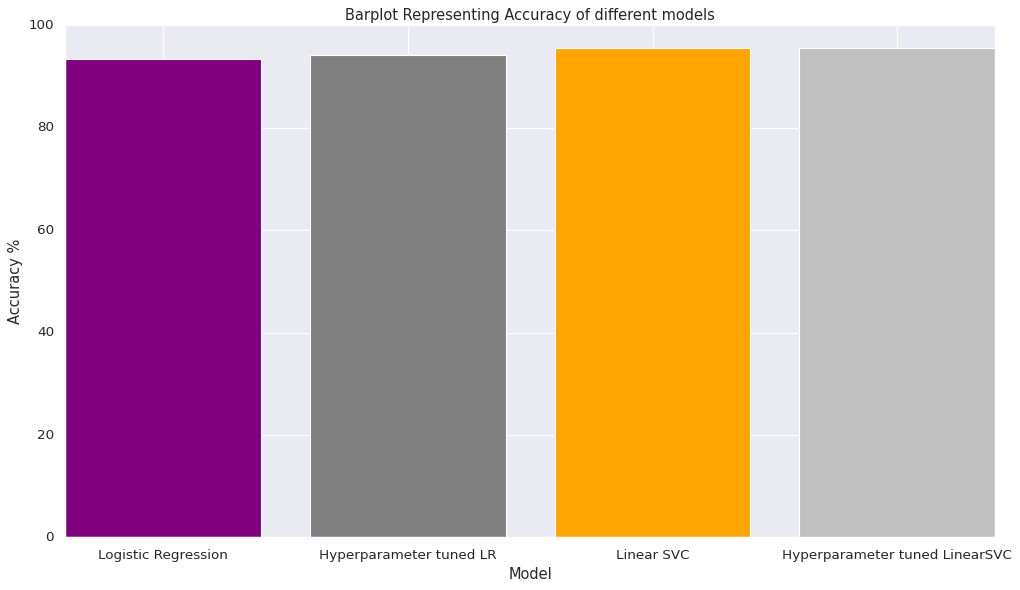

In [ ]:
colors = ['purple','grey','orange','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Model")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Additional code to extract data form twitter using twitter api

In [ ]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [ ]:
# Importing the keys from twitter api
consumerKey = "mi70KxSYW8hphbjpecUqIJy9Y"
consumerSecret = "tfvphke4XeHBSR5H24YJL8LFQL0Pij0tTAk1jrfylpzsRcLNRz"
accessToken = "1594469636430438401-CCvvyp2CgL5hYnF87CCTJbEUbMwrsZ"
accessTokenSecret = "qN7jdlnWtTEcZmt3SQzEU289Ft79GeaUyaHMm9AsmtBdN"

In [ ]:
# Establish the connection with twitter API
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
# Search for the Term and define number of tweets 
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: cricket
Enter how many tweets to search: 2800


In [ ]:
# Get no of tweets and searched term together 
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm).items(NoOfTerms)

In [ ]:
print("Total number:", tweets)

Total number: <tweepy.cursor.ItemIterator object at 0x7f806bb6c4f0>
